In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.ensemble import IsolationForest

data, _ = make_blobs(n_samples=500, centers=1, cluster_std=2, center_box=(0, 0))

In [12]:
iforest = IsolationForest(n_estimators = 100, contamination = 0.03, max_samples ='auto')
prediction = iforest.fit_predict(data)
print(prediction[:20])
print("Number of outliers detected: {}".format(prediction[prediction < 0].sum()))
print("Number of normal samples detected: {}".format(prediction[prediction > 0].sum()))

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Number of outliers detected: -15
Number of normal samples detected: 485


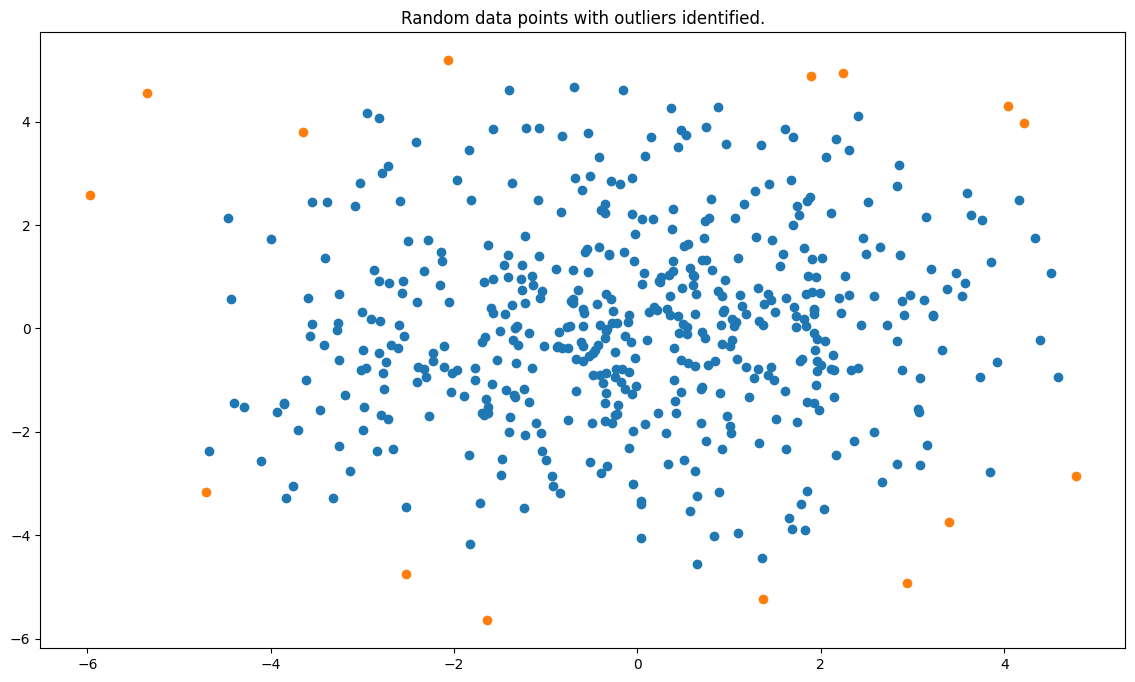

In [15]:
normal_data = data[np.where(prediction > 0)]
outliers = data[np.where(prediction < 0)]
plt.scatter(normal_data[:, 0], normal_data[:, 1])
plt.scatter(outliers[:, 0], outliers[:, 1])
plt.title("Random data points with outliers identified.")
plt.show()

In [16]:
score = iforest.decision_function(data)
data_scores = pd.DataFrame(list(zip(data[:, 0],data[:, 1],score)),columns = ['X','Y','Anomaly Score'])
display(data_scores.head())

,X,Y,Anomaly Score
0,-1.241174,-1.177111,0.188019
1,3.071476,-1.617702,0.096273
2,-0.242443,-0.463028,0.210103
3,0.886919,-3.158147,0.124626
4,1.648527,-3.660803,0.091261


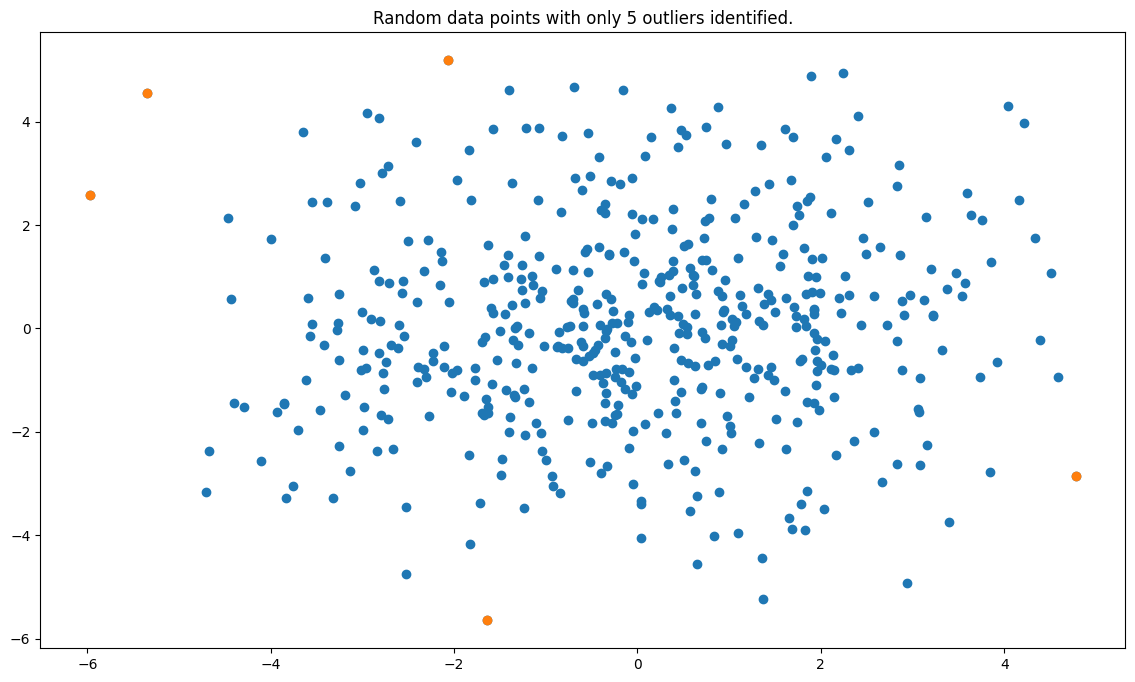

In [19]:
top_5_outliers = data_scores.sort_values(by = ['Anomaly Score']).head()
plt.scatter(data[:, 0], data[:, 1])
plt.scatter(top_5_outliers['X'], top_5_outliers['Y'])
plt.title("Random data points with only 5 outliers identified.")
plt.show()